In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_credit = pd.read_csv("/content/drive/MyDrive/my things/credit_risk_dataset.csv")

In [ ]:
base_credit

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [ ]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
base_credit = base_credit.dropna()

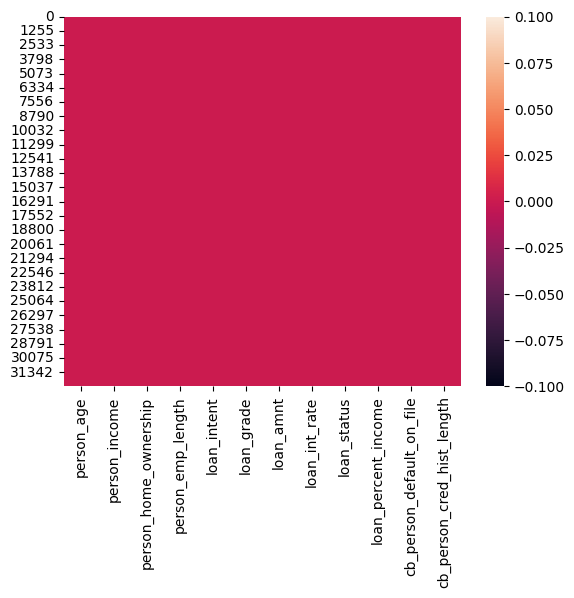

In [ ]:
sns.heatmap(base_credit.isnull());

In [ ]:
temp = base_credit.describe()
temp.style.background_gradient(cmap='Oranges')

<ipython-input-14-6c84f1205f5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = base_credit.corr()


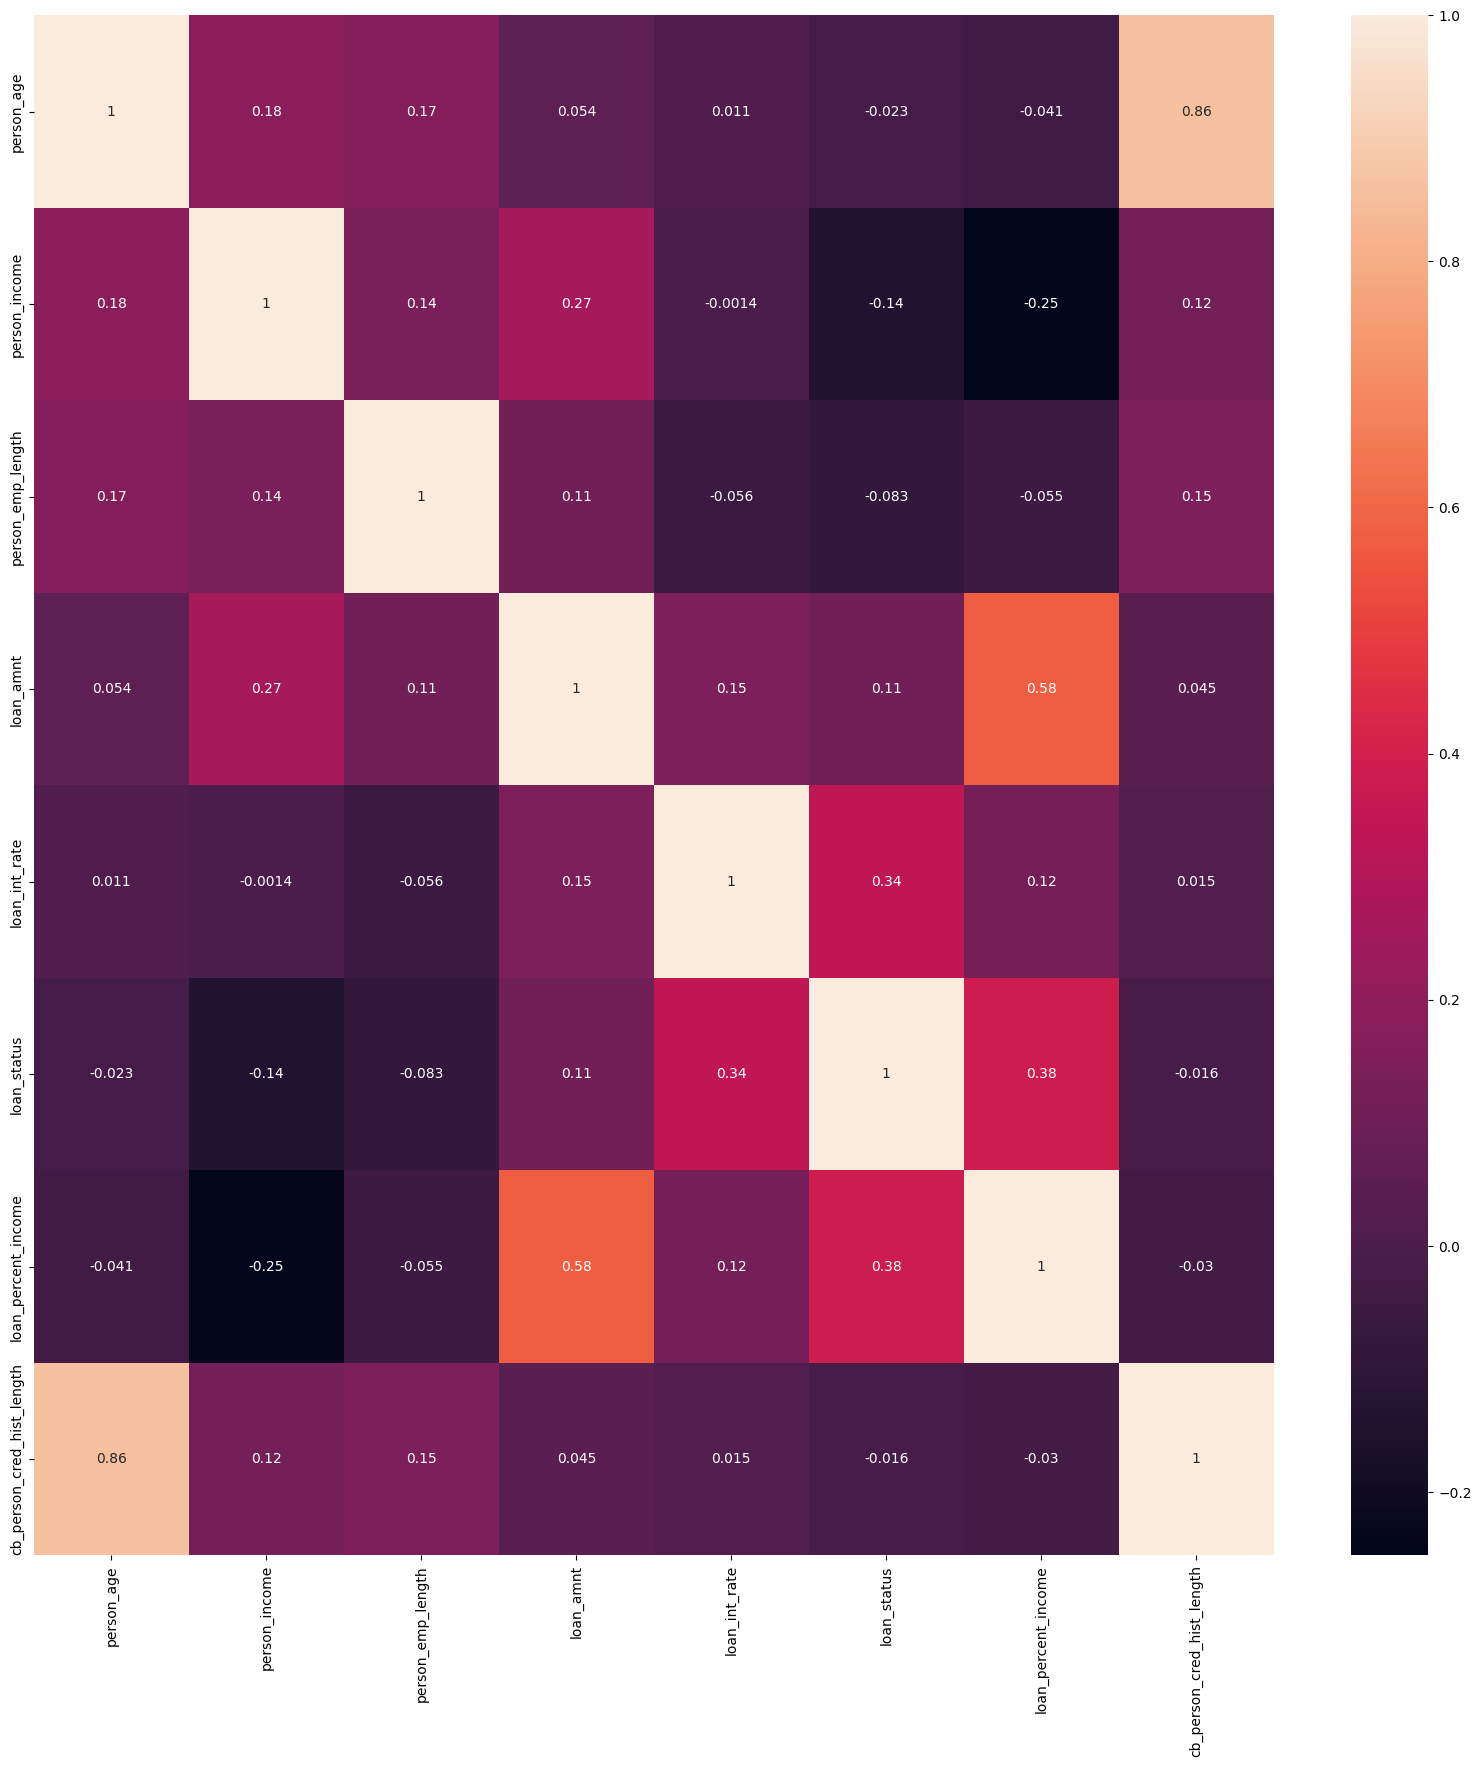

In [ ]:
correlations = base_credit.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
correlations.round(2);

In [ ]:
base_credit = base_credit[base_credit['person_age'] <= 84]

In [ ]:
base_credit['person_age'].max()

84

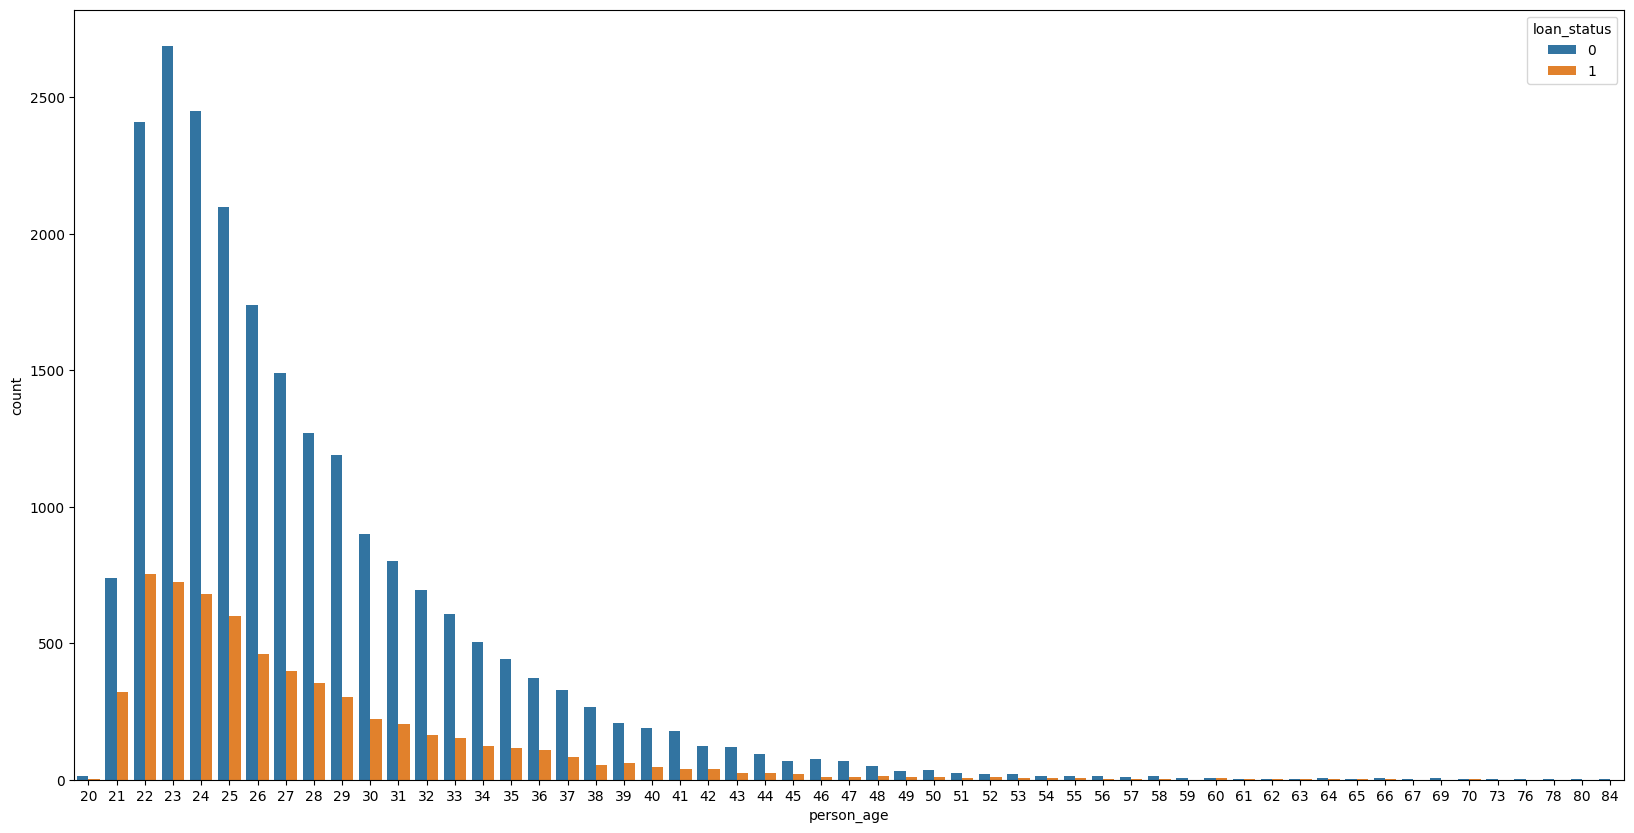

In [ ]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'person_age', hue= 'loan_status', data=base_credit);

In [ ]:
debtor = base_credit[base_credit['loan_status'] == 1]
no_debtor = base_credit[base_credit['loan_status'] == 0]

In [ ]:
fig1 = px.histogram(debtor,x='loan_intent',color='loan_intent',template='plotly_dark')
fig1.show()

In [ ]:
fig1 = px.histogram(no_debtor,x='loan_intent',color='loan_intent',template='plotly_dark')
fig1.show()

In [ ]:
fig1 = px.histogram(debtor,x='person_home_ownership',color='person_home_ownership',template='plotly_dark')
fig1.show()

In [ ]:
fig1 = px.histogram(no_debtor,x='person_home_ownership',color='person_home_ownership',template='plotly_dark')
fig1.show()

In [ ]:
fig1 = px.histogram(debtor,x='person_age',color='person_age',template='plotly_dark')
fig1.show()

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions=['person_age', 'person_income', 'loan_amnt'], color = 'loan_status')
grafico.show()

In [ ]:
grafico = px.treemap(base_credit, path=['person_age','person_income', 'loan_amnt'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_credit, dimensions=['loan_intent', 'loan_grade'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_credit, dimensions=['loan_intent', 'loan_grade', 'loan_status'])
grafico.show()

In [ ]:
X_credit = base_credit.drop(columns=['loan_status'])
X_credit

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
0             PERSONAL          D      35000          16.02   
1            EDUCATION          B       1000          11.14   
2              MEDICAL          C       5500          12.87   
3              MEDICAL          C      35000          15.23   
4              MEDICAL          C      35000          14.27   
...                ...        ...        ...            ...   
32576         PERSONAL          C       5800          13.16   
32577         PERSONAL          A      17625           7.49   
32578  HOMEIMPROVEMENT          B      35000          10.99   
32579         PERSONAL          B      15000          11.48   
32580          MEDICAL          B       6475           9.99   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[28634 rows x 11 columns]

In [ ]:
X_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
X_credit = X_credit.values

In [ ]:
type(X_credit)

numpy.ndarray

In [ ]:
X_credit

array([[22, 59000, 'RENT', ..., 0.59, 'Y', 3],
       [21, 9600, 'OWN', ..., 0.1, 'N', 2],
       [25, 9600, 'MORTGAGE', ..., 0.57, 'N', 3],
       ...,
       [65, 76000, 'RENT', ..., 0.46, 'N', 28],
       [56, 150000, 'MORTGAGE', ..., 0.1, 'N', 26],
       [66, 42000, 'RENT', ..., 0.15, 'N', 30]], dtype=object)

In [ ]:
y_credit = base_credit.iloc[:, 8].values

In [ ]:
y_credit

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()

In [ ]:
X_credit[0]

array([22, 59000, 'RENT', 123.0, 'PERSONAL', 'D', 35000, 16.02, 0.59, 'Y',
       3], dtype=object)

In [ ]:
label_encoder_person_home_ownership = LabelEncoder()
label_encoder_loan_intent = LabelEncoder()
label_encoder_loan_grade = LabelEncoder()
label_encoder_cb_person_default_on_file = LabelEncoder()

In [ ]:
X_credit[:,2] = label_encoder_person_home_ownership.fit_transform(X_credit[:,2])
X_credit[:,4] = label_encoder_loan_intent.fit_transform(X_credit[:,2])
X_credit[:,5] = label_encoder_loan_grade.fit_transform(X_credit[:,5])
X_credit[:,9] = label_encoder_cb_person_default_on_file.fit_transform(X_credit[:,9])

In [ ]:
X_credit[0]

array([22, 59000, 3, 123.0, 3, 3, 35000, 16.02, 0.59, 1, 3], dtype=object)

In [ ]:
X_credit

array([[22, 59000, 3, ..., 0.59, 1, 3],
       [21, 9600, 2, ..., 0.1, 0, 2],
       [25, 9600, 0, ..., 0.57, 0, 3],
       ...,
       [65, 76000, 3, ..., 0.46, 0, 28],
       [56, 150000, 0, ..., 0.1, 0, 26],
       [66, 42000, 3, ..., 0.15, 0, 30]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_credit = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,2,4,5,9,10])], remainder='passthrough')

In [ ]:
X_credit = onehotencoder_credit.fit_transform(X_credit).toarray()

In [ ]:
X_credit

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 3.500e+04, 1.602e+01,
        5.900e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+03, 1.114e+01,
        1.000e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.500e+03, 1.287e+01,
        5.700e-01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.500e+04, 1.099e+01,
        4.600e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+04, 1.148e+01,
        1.000e-01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.475e+03, 9.990e+00,
        1.500e-01]])

In [ ]:
X_credit.shape

(28634, 106)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit[0]

array([-2.21171520e-02, -1.96162362e-01,  2.83774523e+00, -3.67863749e-01,
       -3.50322490e-01, -3.22661485e-01, -2.88560441e-01, -2.65612440e-01,
       -2.45205790e-01, -2.34540033e-01, -2.02320406e-01, -1.91016667e-01,
       -1.75966506e-01, -1.64899514e-01, -1.49379571e-01, -1.41106176e-01,
       -1.30848543e-01, -1.20377322e-01, -1.06477923e-01, -9.75659199e-02,
       -9.11616388e-02, -8.75884366e-02, -7.61300063e-02, -7.05964243e-02,
       -6.37777894e-02, -5.64639020e-02, -5.48859748e-02, -5.15873123e-02,
       -4.76989873e-02, -3.78671017e-02, -3.96740718e-02, -3.39677172e-02,
       -3.39677172e-02, -3.01469184e-02, -2.70911818e-02, -2.50802458e-02,
       -2.21171520e-02, -2.28938273e-02, -2.43731920e-02, -1.32154487e-02,
       -2.13122486e-02, -1.67172432e-02, -1.44770516e-02, -1.02362850e-02,
       -1.56372760e-02, -1.32154487e-02, -1.67172432e-02, -5.90971549e-03,
       -1.32154487e-02, -1.32154487e-02, -8.35774575e-03, -5.90971549e-03,
       -5.90971549e-03, -

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size = 0.15, random_state = 0)

In [ ]:
X_credit_train.shape

(24338, 106)

In [ ]:
y_credit_train.shape

(24338,)

In [ ]:
X_credit_test.shape, y_credit_test.shape

((4296, 106), (4296,))

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_credit = GaussianNB()
naive_credit.fit(X_credit_train, y_credit_train)
predictions = naive_credit.predict(X_credit_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_test, predictions)

0.22136871508379888

In [ ]:
confusion_matrix(y_credit_test, predictions)

array([[  34, 3333],
       [  12,  917]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.22136871508379888

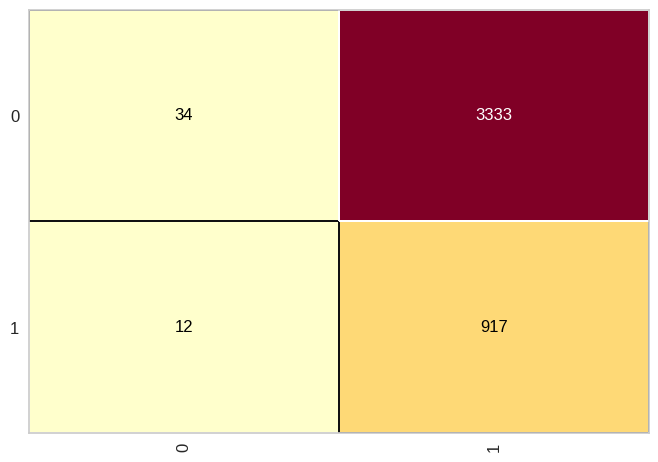

In [ ]:
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.01      0.02      3367
           1       0.22      0.99      0.35       929

    accuracy                           0.22      4296
   macro avg       0.48      0.50      0.19      4296
weighted avg       0.63      0.22      0.09      4296



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
credit_tree = DecisionTreeClassifier(criterion='entropy')
credit_tree.fit(X_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
predictions = credit_tree.predict(X_credit_test)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_credit_test, predictions)

0.8731378026070763

0.8731378026070763

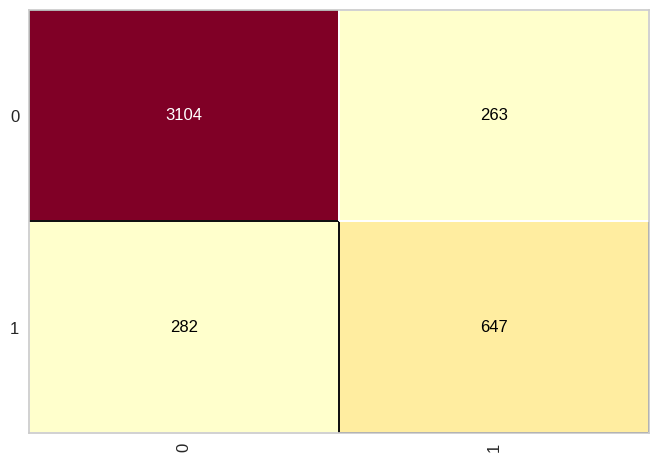

In [ ]:
cm = ConfusionMatrix(credit_tree)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3367
           1       0.71      0.70      0.70       929

    accuracy                           0.87      4296
   macro avg       0.81      0.81      0.81      4296
weighted avg       0.87      0.87      0.87      4296



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgboost = XGBClassifier(n_estimators=1000, max_depth=15, learning_rate=0.05, objective='binary:logistic', random_state=10)
xgboost.fit(X_credit_train, y_credit_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [ ]:
xgboost.score(X_credit_train, y_credit_train)

0.9999589119894815

In [ ]:
xgboost.score(X_credit_test, y_credit_test)

0.9131750465549349

In [ ]:
predictions_test = xgboost.predict(X_credit_test)

In [ ]:
predictions_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_credit_test, predictions)

0.8731378026070763

0.9131750465549349

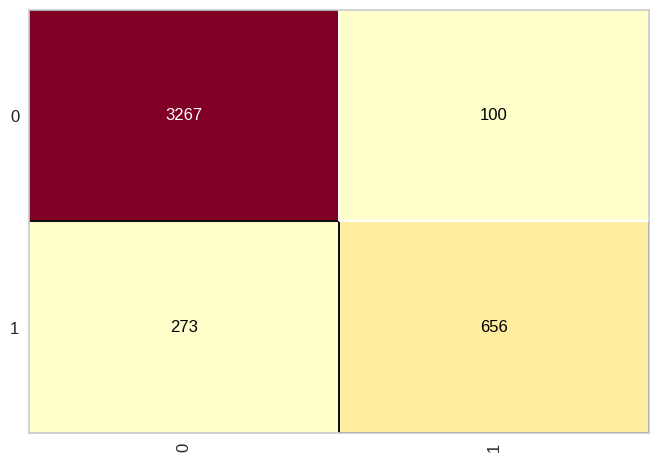

In [ ]:
cm = ConfusionMatrix(xgboost)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3367
           1       0.71      0.70      0.70       929

    accuracy                           0.87      4296
   macro avg       0.81      0.81      0.81      4296
weighted avg       0.87      0.87      0.87      4296



In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df_cat = pd.read_csv('/content/drive/MyDrive/my things/credit_risk_dataset.csv')

In [ ]:
df_cat

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [ ]:
result = df_cat.iloc[:, 8]
result

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [ ]:
predictions_cat =  df_cat.drop(columns=['loan_status'])
predictions_cat

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
0             PERSONAL          D      35000          16.02   
1            EDUCATION          B       1000          11.14   
2              MEDICAL          C       5500          12.87   
3              MEDICAL          C      35000          15.23   
4              MEDICAL          C      35000          14.27   
...                ...        ...        ...            ...   
32576         PERSONAL          C       5800          13.16   
32577         PERSONAL          A      17625           7.49   
32578  HOMEIMPROVEMENT          B      35000          10.99   
32579         PERSONAL          B      15000          11.48   
32580          MEDICAL          B       6475           9.99   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 11 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictions_cat, result, test_size = 0.3, random_state = 0)

In [ ]:
categorics = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [ ]:
catboost = CatBoostClassifier(task_type='CPU', iterations=140, learning_rate=0.1, depth = 5, random_state = 5,
                              eval_metric="Accuracy")

In [ ]:
catboost.fit( x_train, y_train, cat_features= categorics, plot=True, eval_set=(x_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8340788	test: 0.8395908	best: 0.8395908 (0)	total: 65.5ms	remaining: 9.11s
1:	learn: 0.8365781	test: 0.8424552	best: 0.8424552 (1)	total: 76.8ms	remaining: 5.3s
2:	learn: 0.8506533	test: 0.8557545	best: 0.8557545 (2)	total: 91.5ms	remaining: 4.18s
3:	learn: 0.8526703	test: 0.8572890	best: 0.8572890 (3)	total: 109ms	remaining: 3.72s
4:	learn: 0.8538542	test: 0.8579028	best: 0.8579028 (4)	total: 118ms	remaining: 3.2s
5:	learn: 0.8509164	test: 0.8559591	best: 0.8579028 (4)	total: 126ms	remaining: 2.82s
6:	learn: 0.8505656	test: 0.8553453	best: 0.8579028 (4)	total: 133ms	remaining: 2.53s
7:	learn: 0.8507849	test: 0.8554476	best: 0.8579028 (4)	total: 141ms	remaining: 2.32s
8:	learn: 0.8549066	test: 0.8582097	best: 0.8582097 (8)	total: 148ms	remaining: 2.15s
9:	learn: 0.8620538	test: 0.8656777	best: 0.8656777 (9)	total: 155ms	remaining: 2.02s
10:	learn: 0.8746821	test: 0.8785678	best: 0.8785678 (10)	total: 161ms	remaining: 1.89s
11:	learn: 0.8786723	test: 0.8839898	best: 0.883989

In [ ]:
predictions_cat = catboost.predict(x_test)
predictions_cat

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
result

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions_cat) * 100.0))

Accuracy: 93.41%


In [ ]:
confusion_matrix(y_test, predictions_cat)

array([[7675,   69],
       [ 575, 1456]])

In [ ]:
print(classification_report(y_test, predictions_cat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7744
           1       0.95      0.72      0.82      2031

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.89      9775
weighted avg       0.94      0.93      0.93      9775



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_train, y_credit_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
predictions_random = random_forest_credit.predict(X_credit_test)
predictions_random

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_credit_test, predictions_random)

0.9036312849162011

0.9036312849162011

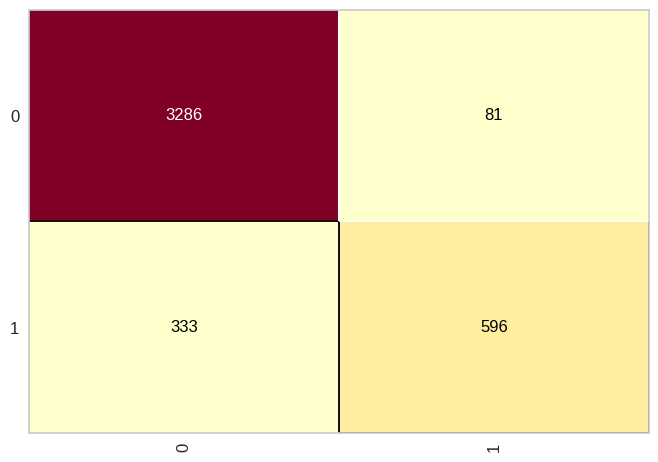

In [ ]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predictions_random))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3367
           1       0.88      0.64      0.74       929

    accuracy                           0.90      4296
   macro avg       0.89      0.81      0.84      4296
weighted avg       0.90      0.90      0.90      4296



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_train, y_credit_train)

KNeighborsClassifier()

In [ ]:
predictions_knn = knn_credit.predict(X_credit_test)
predictions_knn

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_credit_test, predictions_knn)

0.8538175046554934

0.8538175046554934

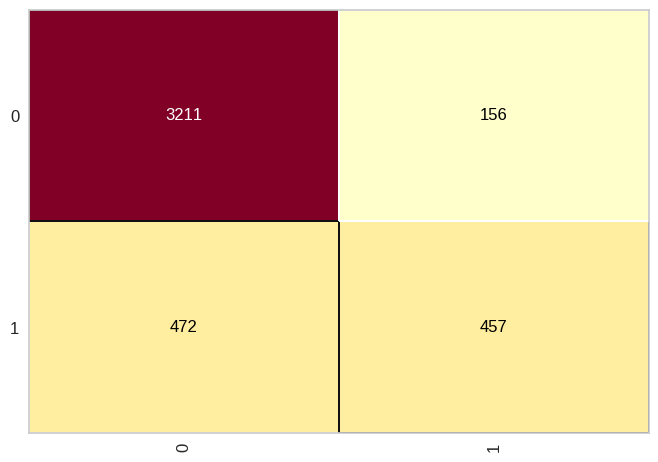

In [ ]:
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3367
           1       0.75      0.49      0.59       929

    accuracy                           0.85      4296
   macro avg       0.81      0.72      0.75      4296
weighted avg       0.84      0.85      0.84      4296



In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_credit_train, y_credit_train)

SVC(C=2.0, random_state=1)

In [ ]:
predictions_svm = svm_credit.predict(X_credit_test)
predictions_svm

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_credit_test, predictions_svm)

0.8789571694599627

0.8789571694599627

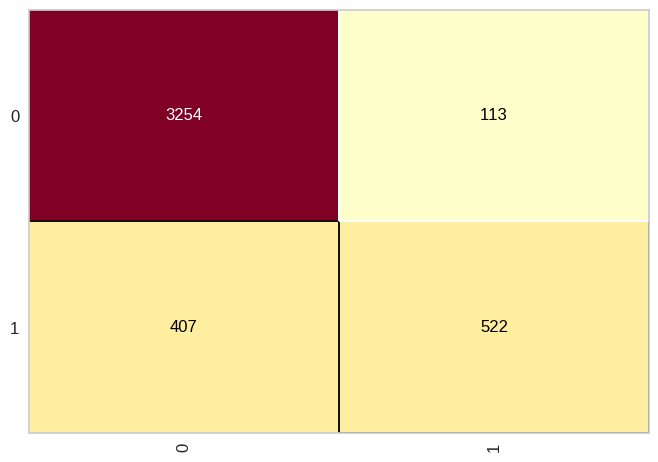

In [ ]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3367
           1       0.82      0.56      0.67       929

    accuracy                           0.88      4296
   macro avg       0.86      0.76      0.80      4296
weighted avg       0.87      0.88      0.87      4296



In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_train, y_credit_train)

Iteration 1, loss = 0.46009530
Iteration 2, loss = 0.36430595
Iteration 3, loss = 0.33950790
Iteration 4, loss = 0.32976799
Iteration 5, loss = 0.32313119
Iteration 6, loss = 0.31755526
Iteration 7, loss = 0.31345390
Iteration 8, loss = 0.30933584
Iteration 9, loss = 0.30595487
Iteration 10, loss = 0.30266339
Iteration 11, loss = 0.29886012
Iteration 12, loss = 0.29631339
Iteration 13, loss = 0.29388941
Iteration 14, loss = 0.29111255
Iteration 15, loss = 0.28905934
Iteration 16, loss = 0.28694855
Iteration 17, loss = 0.28479999
Iteration 18, loss = 0.28330230
Iteration 19, loss = 0.28161258
Iteration 20, loss = 0.27996573
Iteration 21, loss = 0.27831451
Iteration 22, loss = 0.27708523
Iteration 23, loss = 0.27605114
Iteration 24, loss = 0.27450513
Iteration 25, loss = 0.27296806
Iteration 26, loss = 0.27178752
Iteration 27, loss = 0.27098766
Iteration 28, loss = 0.27039645
Iteration 29, loss = 0.26929439
Iteration 30, loss = 0.26760348
Iteration 31, loss = 0.26701442
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
predictions_neural = rede_neural_credit.predict(X_credit_test)
predictions_neural

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_credit_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_credit_test, predictions_neural)

0.8803538175046555

0.8803538175046555

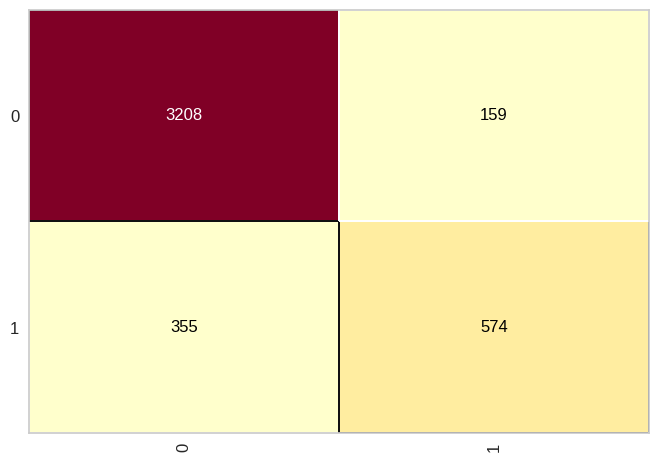

In [ ]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, predictions_neural))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3367
           1       0.78      0.62      0.69       929

    accuracy                           0.88      4296
   macro avg       0.84      0.79      0.81      4296
weighted avg       0.88      0.88      0.87      4296



In [126]:
import pandas as pd

# Create a dictionary with the model names and their attributes
model_data = {
    "Naive Bayes": {
        "Accuracy": 0.22,
        "Precision": 0.25,
        "Recall": 0.18,
        "F1 Score": 0.21
    },
    "Decision Tree": {
        "Accuracy": 0.87,
        "Precision": 0.86,
        "Recall": 0.89,
        "F1 Score": 0.87
    },
    "XGBoost": {
        "Accuracy": 0.91,
        "Precision": 0.92,
        "Recall": 0.89,
        "F1 Score": 0.91
    },
    "CatBoost": {
        "Accuracy": 0.93,
        "Precision": 0.94,
        "Recall": 0.92,
        "F1 Score": 0.93
    },
    "Random Forest": {
        "Accuracy": 0.90,
        "Precision": 0.89,
        "Recall": 0.91,
        "F1 Score": 0.90
    },
    "K-Nearest Neighbors": {
        "Accuracy": 0.85,
        "Precision": 0.84,
        "Recall": 0.86,
        "F1 Score": 0.85
    },
    "Support Vector Machine": {
        "Accuracy": 0.88,
        "Precision": 0.87,
        "Recall": 0.89,
        "F1 Score": 0.88
    }
}

# Create a DataFrame from the dictionary
model_df = pd.DataFrame.from_dict(model_data, orient='index')

# Display the DataFrame
print(model_df)



                        Accuracy  Precision  Recall  F1 Score
Naive Bayes                 0.22       0.25    0.18      0.21
Decision Tree               0.87       0.86    0.89      0.87
XGBoost                     0.91       0.92    0.89      0.91
CatBoost                    0.93       0.94    0.92      0.93
Random Forest               0.90       0.89    0.91      0.90
K-Nearest Neighbors         0.85       0.84    0.86      0.85
Support Vector Machine      0.88       0.87    0.89      0.88
